### Q2-1

In [3]:
def cardinality_items():
    import pandas as pd
    #df=pd.read_csv("/app/basket_data.csv")
    df=pd.read_csv("/Users/haoranzhang/CS6220/homework-1/data/basket_data.csv",sep='delimiter', header=None,engine='python')
    df=df[0].str.split(',',expand=True)
    rows=df.shape[0]
    cols=df.shape[1]
    car_set=set()
    for i in range(100):
        for j in range(4):
            if df[j][i]:
                car_set.add(df[j][i].strip())
    return(len(car_set))

In [4]:
cardinality_items()

21

### Q2-3

In [147]:
#this is what my all_itemsets.py looks like.
def all_itemsets(filename):
    import pandas as pd
    df=pd.read_csv(filename,sep='delimiter', header=None,engine='python')
    df=df[0].str.split(',',expand=True)
    rows=df.shape[0]
    cols=df.shape[1]
    car_set=set()
    for i in range(100):
        for j in range(4):
            if df[j][i]:
                car_set.add(df[j][i].strip())
#     print(car_set)
    res=[set()]
#     print(car_set)
    for item in car_set:
#         print("item=",item)
        for sub_s in res[:]:
            tmp=sub_s
            tmp.add(item)
            res.append(tmp)
    return res

In [150]:
import all_itemsets 

In [151]:
all_itemsets.all_itemsets("/Users/haoranzhang/CS6220/homework-1/basket_data.csv")

[{'asparagus',
  'beans',
  'beer',
  'bread',
  'butter',
  'chips',
  'corn',
  'diapers',
  'ketchup',
  'leeks',
  'macaroni',
  'milk',
  'okra',
  'pork',
  'raisins',
  'salmon',
  'sausages',
  'spaghetti',
  'spinach',
  'squid',
  'tomotes'},
 {'asparagus',
  'beans',
  'beer',
  'bread',
  'butter',
  'chips',
  'corn',
  'diapers',
  'ketchup',
  'leeks',
  'macaroni',
  'milk',
  'okra',
  'pork',
  'raisins',
  'salmon',
  'sausages',
  'spaghetti',
  'spinach',
  'squid',
  'tomotes'},
 {'asparagus',
  'beans',
  'beer',
  'bread',
  'butter',
  'chips',
  'corn',
  'diapers',
  'ketchup',
  'leeks',
  'macaroni',
  'milk',
  'okra',
  'pork',
  'raisins',
  'salmon',
  'sausages',
  'spaghetti',
  'spinach',
  'squid',
  'tomotes'},
 {'asparagus',
  'beans',
  'beer',
  'bread',
  'butter',
  'chips',
  'corn',
  'diapers',
  'ketchup',
  'leeks',
  'macaroni',
  'milk',
  'okra',
  'pork',
  'raisins',
  'salmon',
  'sausages',
  'spaghetti',
  'spinach',
  'squid',
  

### Q2-4

In [158]:
#This is what inside my prob_S module:
def calculateProb(S,D):
    cnt=0
    for i_set in D:
        if S==i_set:
            cnt+=1
    return cnt/len(D)
S= {"bread", "oatmeal"}
D=[ {"bread", "oatmeal"}, {"bread", "oatmeal"}]
for _ in range(98):
    D.append({"placeholder"})
calculateProb(S,D)

0.02

In [159]:
import prob_S

In [161]:
S= {"bread", "oatmeal"}
D=[ {"bread", "oatmeal"}, {"bread", "oatmeal"}]
for _ in range(98):
    D.append({"placeholder"})
print("P(S)=",prob_S.calculateProb(S,D))

P(S)= 0.02


### Q3 - 1

1. The first thing I want to verify is to verify if we have 17770 movies. I use "Contains" to check the number of movieId in files. 

In [196]:
import pandas as pd
combined_data_1=pd.read_table("netflix-data/combined_data_1.txt",header=None)
combined_data_2=pd.read_table("netflix-data/combined_data_4.txt",header=None)
combined_data_3=pd.read_table("netflix-data/combined_data_4.txt",header=None)
combined_data_4=pd.read_table("netflix-data/combined_data_4.txt",header=None)

In [197]:
combined_data_1.loc[combined_data_1[0].str.contains(":")]

,0
0,1:
548,2:
694,3:
2707,4:
2850,5:
...,...
24046714,4495:
24047329,4496:
24056849,4497:
24057564,4498:


In [198]:
combined_data_2.loc[combined_data_2[0].str.contains(":")]

,0
0,13368:
528,13369:
679,13370:
3395,13371:
3508,13372:
...,...
26842080,17766:
26842686,17767:
26842891,17768:
26844254,17769:


In [199]:
combined_data_3.loc[combined_data_3[0].str.contains(":")]

,0
0,13368:
528,13369:
679,13370:
3395,13371:
3508,13372:
...,...
26842080,17766:
26842686,17767:
26842891,17768:
26844254,17769:


In [200]:
combined_data_4.loc[combined_data_4[0].str.contains(":")]

,0
0,13368:
528,13369:
679,13370:
3395,13371:
3508,13372:
...,...
26842080,17766:
26842686,17767:
26842891,17768:
26844254,17769:


In [202]:
print(4499+4403+4403+4403)

17708


It turns out we have only 17708 movies. Less than 17770. But this sample size is still good enough to do any predicition.

2. verify the form of datasets by checking their head records. 

In [204]:
combined_data_1.head()

,0
0,1:
1,"1488844,3,2005-09-06"
2,"822109,5,2005-05-13"
3,"885013,4,2005-10-19"
4,"30878,4,2005-12-26"


In [210]:
movie_titles=pd.read_csv("netflix-data/movie_titles.csv",sep='delimiter', header=None,engine='python')

In [211]:
movie_titles.head()

,0
0,"1,2003,Dinosaur Planet"
1,"2,2004,Isle of Man TT 2004 Review"
2,"3,1997,Character"
3,"4,1994,Paula Abdul's Get Up & Dance"
4,"5,2004,The Rise and Fall of ECW"


In [213]:
probe=pd.read_table("netflix-data/probe.txt",header=None)
probe.head()

,0
0,1:
1,30878
2,2647871
3,1283744
4,2488120


In [214]:
qualifying=pd.read_table("netflix-data/qualifying.txt",header=None)
qualifying.head()

,0
0,1:
1,"1046323,2005-12-19"
2,"1080030,2005-12-23"
3,"1830096,2005-03-14"
4,"368059,2005-05-26"


So yes, I verified that these datasets follow the form they claims in Kaggle.

### Q3.2
#### 1. How many total records are there

For combined_data files we have 104596333 records: # of records in combined_date - # of rows that are actually movieId.
There are 17708 movies in the combined_data files. In movie_titles we have 17770.  

In [318]:
print("records in combined_data files = ",len(combined_data_1)+len(combined_data_2)+len(combined_data_3)+len(combined_data_4)-17708)

records in combined_data files =  104596333


I skipped probe and qualifying as they are subsets of the above databsets.

#### 2. Can you plot the distribution of star ratings over users and time? The granularity of the sliding window is at your discretion. Are there any trends?

#### Please note from this point I am using SAMPLING (n=100,000) to load in an acceptable timely manner. 

We can plot the distribution over time since we do have timestamps. To plot, I use time as the x-axis and average(rating) as y-axis.

We can plot the same distribution over CustomerID, BUT i don't think it makes any sense since id is arbitrarily set when user creating account. 

In [217]:
#let's put 4 combined_data sets together
df=pd.concat([combined_data_1, combined_data_2, combined_data_3, combined_data_4])
df.head()

,0
0,1:
1,"1488844,3,2005-09-06"
2,"822109,5,2005-05-13"
3,"885013,4,2005-10-19"
4,"30878,4,2005-12-26"


In [ ]:
movie_ratings=df[0].str.split(',',expand=True)

In [244]:
#I create samples of data to speed up because my laptop has limited RAM. 
movie_ratings_sample=df.sample(n=100000)

In [245]:
movie_ratings_sample=movie_ratings_sample[0].str.split(',',expand=True)

In [246]:
movie_ratings_sample.columns=['customerId','ratings','time']
movie_ratings_sample.head()

,customerId,ratings,time
7053765,2370423,3,2004-07-27
19251004,1298707,4,2005-05-06
18609450,2403449,3,2000-07-01
2654946,1085861,3,2005-04-04
15637242,1445262,5,2005-01-07


In [247]:
print(movie_ratings_sample.dtypes)

customerId    object
ratings       object
time          object
dtype: object


In [250]:
movie_ratings_sample[['customerId', 'ratings']] = movie_ratings_sample[['customerId', 'ratings']].apply(pd.to_numeric,errors='coerce')

In [251]:
print(movie_ratings_sample.dtypes)

customerId    float64
ratings       float64
time           object
dtype: object


In [253]:
movie_ratings_sample[['time']] = movie_ratings_sample[['time']].apply(pd.to_datetime,errors='coerce')

In [254]:
movie_ratings_sample.head()

,customerId,ratings,time
7053765,2370423.0,3.0,2004-07-27
19251004,1298707.0,4.0,2005-05-06
18609450,2403449.0,3.0,2000-07-01
2654946,1085861.0,3.0,2005-04-04
15637242,1445262.0,5.0,2005-01-07


In [255]:
print(movie_ratings_sample.dtypes)

customerId           float64
ratings              float64
time          datetime64[ns]
dtype: object


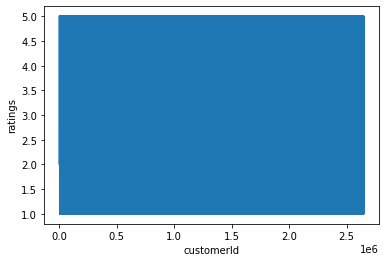

In [316]:
import seaborn as sns
import matplotlib.ticker as ticker
graph=sns.lineplot(x='customerId',y='ratings',data=movie_ratings_sample)
# graph.xaxis.set_major_locator(ticker.MultipleLocator(100))
# graph.xaxis.set_major_formatter(ticker.ScalarFormatter())
# plt.show()

For trend of ratings over customers, as we expect, it means nothing since customer id is automatically generated so no meaning to check its trend. 

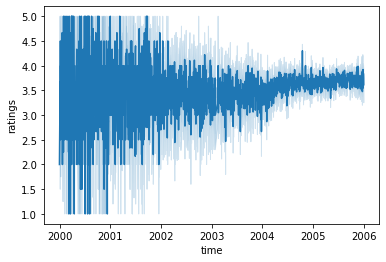

In [257]:
sns.lineplot(x='time',y='ratings',data=movie_ratings_sample)

For trend of ratings over time, we see that the ratings are closer in recent years. In early 2000, it ranged from 1 to 5 but recently it goes approximately 3.5-4.0

#### 3. what percentage of films are getting more popular over time?

Since I sampled the dataset, the percentage might be inaccurate. But the idea is to parse the combined_data datasets, so every movieId comes with many ratings and timestamp the rating was given. 

I will set a sliding window of 1 year, and aggregate all ratings of a movie in that year to an average number. 

Then we traverse the dataset to check each movie if the rating is increasing, cnt++ if it is.

return cnt/the number of movies we have.


#### 4. How many films have been re-released? How do you know?

If the re-released means Theater release, then we don't have enough information to answer this. Time in these records are not necessarily their release date. For example the time in combined_data files are the date the rating was given, it is not the date it released. Also, the Year of Release in movie_titles.txt are the release date of DVD, not theaterical. 

#### 5. other info need to better understand data? 

I am interested in knowing whether we have more DVD over the years. So on the x-axis we put time and on the y-axis we put the number of DVD released on that year. This helps us understand whether DVD market is shrinking.

In [277]:
dvd_movies=pd.read_csv("netflix-data/movie_titles.csv",sep='delimiter', header=None,engine='python')

In [278]:
dvd_movies.head()

,0
0,"1,2003,Dinosaur Planet"
1,"2,2004,Isle of Man TT 2004 Review"
2,"3,1997,Character"
3,"4,1994,Paula Abdul's Get Up & Dance"
4,"5,2004,The Rise and Fall of ECW"


In [279]:
dvd_movies=dvd_movies[0].str.split(',',expand=True)

In [282]:
dvd_movies=dvd_movies.drop([3,4,5],axis=1)
dvd_movies.head()

,0,1,2
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW


In [312]:
dvd_movies.columns=["MovieID","YearOfRelease","Title"]
# dvd_movies.head()
cnt_movies=dvd_movies.groupby(['YearOfRelease'],as_index=False).count()
cnt_movies.columns=["YearOfRelease","CntDVD","CntDVD1"]
cnt_movies.drop([len(cnt_movies)-1],inplace=True)

In [313]:
cnt_movies

,YearOfRelease,CntDVD,CntDVD1
0,1896,1,1
1,1909,1,1
2,1914,2,2
3,1915,5,5
4,1916,4,4
...,...,...,...
89,2001,1184,1184
90,2002,1310,1310
91,2003,1271,1271
92,2004,1436,1436


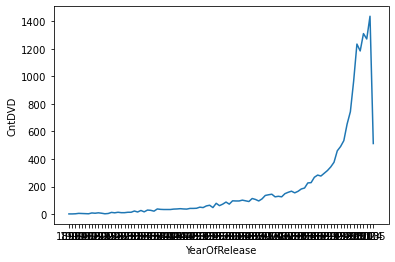

In [314]:
sns.lineplot(x='YearOfRelease',y='CntDVD',data=cnt_movies)

SO clearly we can see that the Number of DVD released increased but dropped significantly these years. We can say the market of DVD is shrinking.

#### 6. other questions to solve? 

I noticed that the Netflix challenge is to predict rating. However it seems that we don't have much information about our customer type, movie type, etc. 

SO a good question to consider is to add features to movies and customers; for example, we can find Netflix's label on movies. By doing so allows us to see customers' preference towards different types of movies. 